<a href="https://colab.research.google.com/github/mjay768/AIProject/blob/master/Predicting_Pulsar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting a Pulsar Star

HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey . 


Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter . 
As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes. 
Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation . Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find. 

Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted, which treat the candidate data sets as binary classification problems. Here the legitimate pulsar examples are a minority positive class, and spurious examples the majority negative class.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators. 
Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive). 


Attribute Information:

1. Mean of the integrated profile. 
2. Standard deviation of the integrated profile. 
3. Excess kurtosis of the integrated profile. 
4.  Skewness of the integrated profile. 
5. Mean of the DM-SNR curve. 
6. Standard deviation of the DM-SNR curve. 
7. Excess kurtosis of the DM-SNR curve. 
8. Skewness of the DM-SNR curve. 
9. Class 

*HTRU 2 Summary 17,898 total examples. 1,639 positive examples. 16,259 negative examples.

*Kaggle is the source for this Information and Dataset

In [14]:
from google.colab import files
uploaded = files.upload()
uploaded = files.upload()

Saving HTRU_2.csv to HTRU_2 (1).csv


Saving pulsar_stars.csv to pulsar_stars.csv


**Loading the Dataset**

In [0]:
import io
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

#url1 = "https://raw.githubusercontent.com/mjay768/AIProject/master/pulsar_stars.csv" 
#url2 = "https://raw.githubusercontent.com/mjay768/AIProject/master/HTRU_2.csv"
#ds = np.read_csv(url1)
#ts = np.read_csv(url2)
ds = np.loadtxt("pulsar_stars.csv", delimiter = ",", skiprows =1)#
ts = np.loadtxt("HTRU_2.csv", delimiter = ",", skiprows =1)


In [17]:
print(ds[0:5])
print("------------------------------------------------------------------------------------")
print(ts[0:5])

[[ 1.40562500e+02  5.56837821e+01 -2.34571412e-01 -6.99648398e-01
   3.19983278e+00  1.91104263e+01  7.97553179e+00  7.42422249e+01
   0.00000000e+00]
 [ 1.02507812e+02  5.88824300e+01  4.65318154e-01 -5.15087909e-01
   1.67725752e+00  1.48601457e+01  1.05764867e+01  1.27393580e+02
   0.00000000e+00]
 [ 1.03015625e+02  3.93416494e+01  3.23328365e-01  1.05116443e+00
   3.12123746e+00  2.17446687e+01  7.73582202e+00  6.31719091e+01
   0.00000000e+00]
 [ 1.36750000e+02  5.71784487e+01 -6.84146380e-02 -6.36238369e-01
   3.64297659e+00  2.09592803e+01  6.89649891e+00  5.35936607e+01
   0.00000000e+00]
 [ 8.87265625e+01  4.06722254e+01  6.00866079e-01  1.12349169e+00
   1.17892977e+00  1.14687196e+01  1.42695728e+01  2.52567306e+02
   0.00000000e+00]]
------------------------------------------------------------------------------------
[[ 1.02507812e+02  5.88824300e+01  4.65318154e-01 -5.15087909e-01
   1.67725752e+00  1.48601457e+01  1.05764867e+01  1.27393580e+02
   0.00000000e+00]
 [ 1.030

In [9]:
print(ds.shape)
print(ts.shape)

(17898, 9)
(17897, 9)


In [18]:
print(ds[0:10,:])

[[ 1.40562500e+02  5.56837821e+01 -2.34571412e-01 -6.99648398e-01
   3.19983278e+00  1.91104263e+01  7.97553179e+00  7.42422249e+01
   0.00000000e+00]
 [ 1.02507812e+02  5.88824300e+01  4.65318154e-01 -5.15087909e-01
   1.67725752e+00  1.48601457e+01  1.05764867e+01  1.27393580e+02
   0.00000000e+00]
 [ 1.03015625e+02  3.93416494e+01  3.23328365e-01  1.05116443e+00
   3.12123746e+00  2.17446687e+01  7.73582202e+00  6.31719091e+01
   0.00000000e+00]
 [ 1.36750000e+02  5.71784487e+01 -6.84146380e-02 -6.36238369e-01
   3.64297659e+00  2.09592803e+01  6.89649891e+00  5.35936607e+01
   0.00000000e+00]
 [ 8.87265625e+01  4.06722254e+01  6.00866079e-01  1.12349169e+00
   1.17892977e+00  1.14687196e+01  1.42695728e+01  2.52567306e+02
   0.00000000e+00]
 [ 9.35703125e+01  4.66981135e+01  5.31904850e-01  4.16721117e-01
   1.63628763e+00  1.45450743e+01  1.06217484e+01  1.31394004e+02
   0.00000000e+00]
 [ 1.19484375e+02  4.87650593e+01  3.14602200e-02 -1.12167573e-01
   9.99163880e-01  9.2796122

In [19]:
print(np.max(ds[:,8]))
print(np.min(ds[:,8]))

1.0
0.0


**Now, We split the data into training and testing datasets**

In [21]:
ds_train = ds[0:8949,:]
ds_test = ds[8949:,:]
ts_test = ts[0:30,:]
print(ds_train.shape)
print(ds_test.shape)

(8949, 9)
(8949, 9)


# Let us plot each input feature with the output feature to observe the data distribution

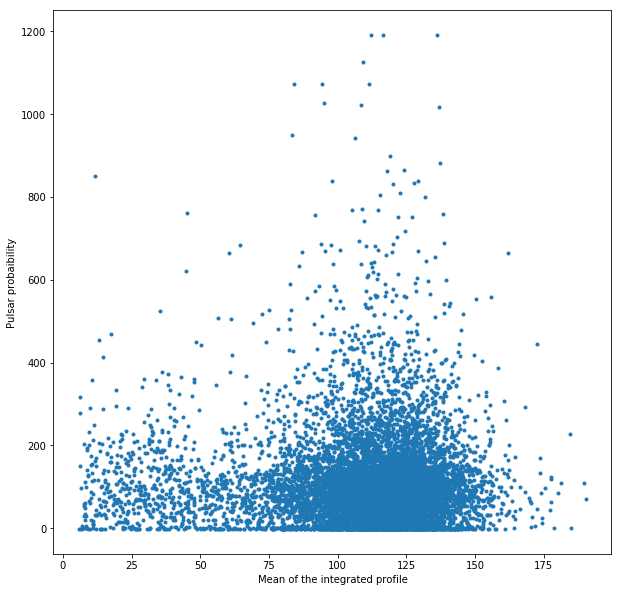

In [22]:
plt.figure(figsize=(10,10))
plt.plot(ds_train[:,0],ds_test[:,7],'.')
plt.xlabel("Mean of the integrated profile")
plt.ylabel("Pulsar probaibility")
plt.show()

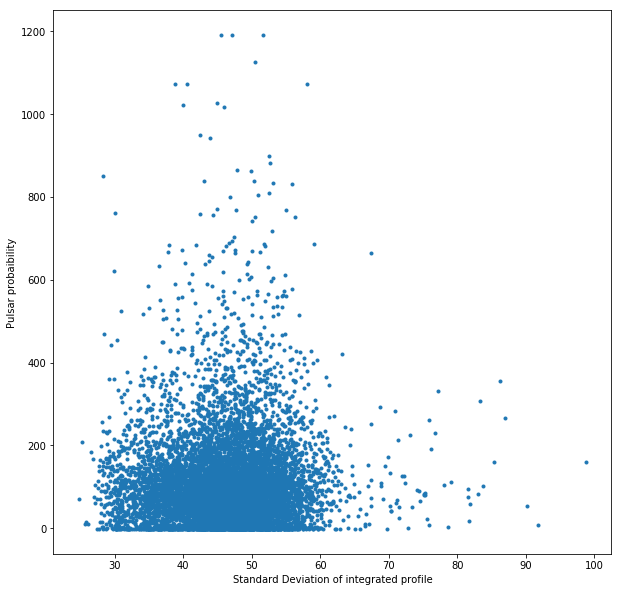

In [18]:
plt.figure(figsize=(10,10))
plt.plot(ds_train[:,1],ds_test[:,7],'.')
plt.xlabel("Standard Deviation of integrated profile")
plt.ylabel("Pulsar probaibility")
plt.show()

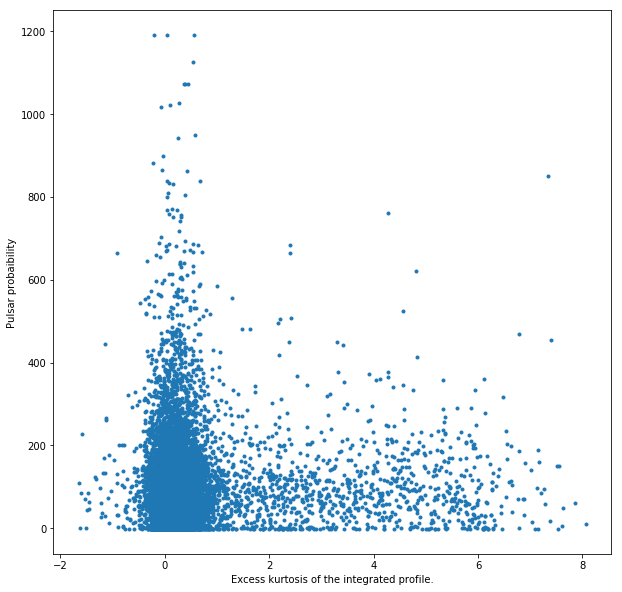

In [10]:
plt.figure(figsize=(10,10))
plt.plot(ds_train[:,2],ds_test[:,7],'.')
plt.xlabel("Excess kurtosis of the integrated profile.")
plt.ylabel("Pulsar probaibility")
plt.show()

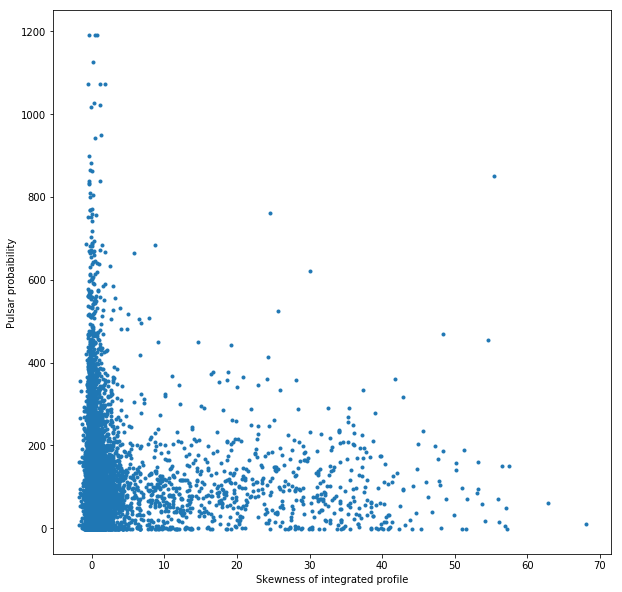

In [11]:
plt.figure(figsize=(10,10))
plt.plot(ds_train[:,3],ds_test[:,7],'.')
plt.xlabel("Skewness of integrated profile")
plt.ylabel("Pulsar probaibility")
plt.show()

Below is the DM-SNR vs output plot. DM-SNR stand s for Dispersion Measure Signal-to-noise Ratio. It is a measure that shows how the SNR varies with small changes in the folding period and DM. But please note that here we are plotting DM-SNR with the output feature but not DM vs SNR. 

DM-SNR


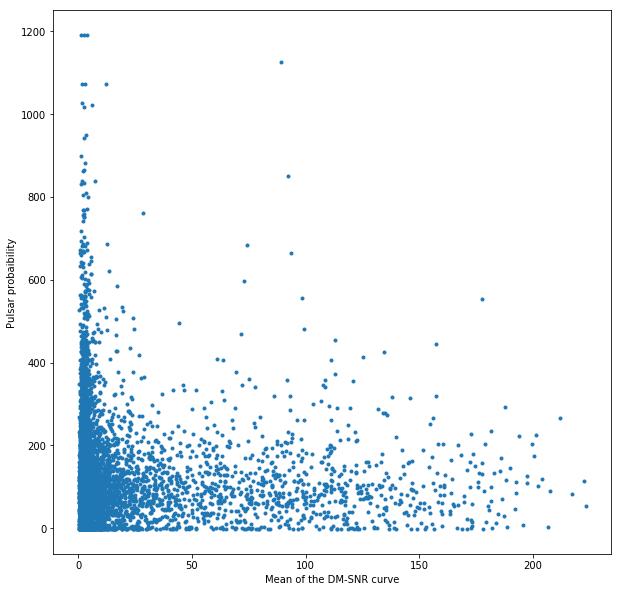

In [13]:

plt.figure(figsize=(10,10))
plt.plot(ds_train[:,4],ds_test[:,7],'.')
plt.xlabel("Mean of the DM-SNR curve")
plt.ylabel("Pulsar probaibility")
plt.show()

In [3]:

plt.figure(figsize=(10,10))
plt.plot(ds_train[:,5],ds_test[:,7],'.')
plt.xlabel("Standard Deviation of DM-SNR curve")
plt.ylabel("Pulsar probaibility")
plt.show()

NameError: ignored

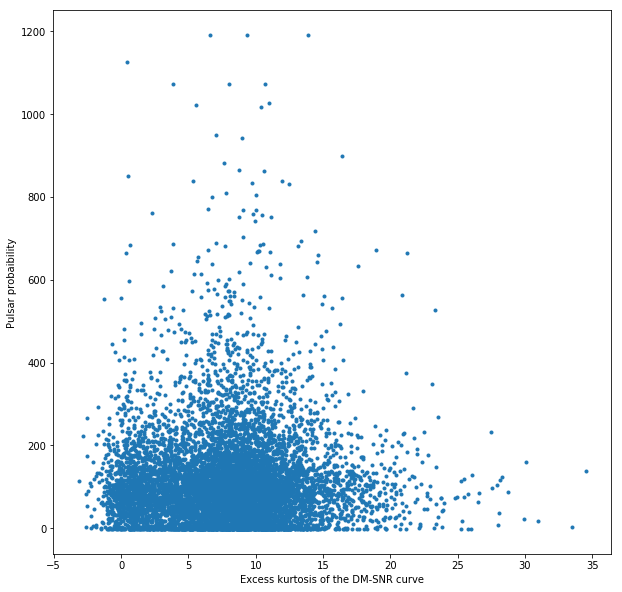

In [15]:

plt.figure(figsize=(10,10))
plt.plot(ds_train[:,6],ds_test[:,7],'.')
plt.xlabel("Excess kurtosis of the DM-SNR curve")
plt.ylabel("Pulsar probaibility")
plt.show()

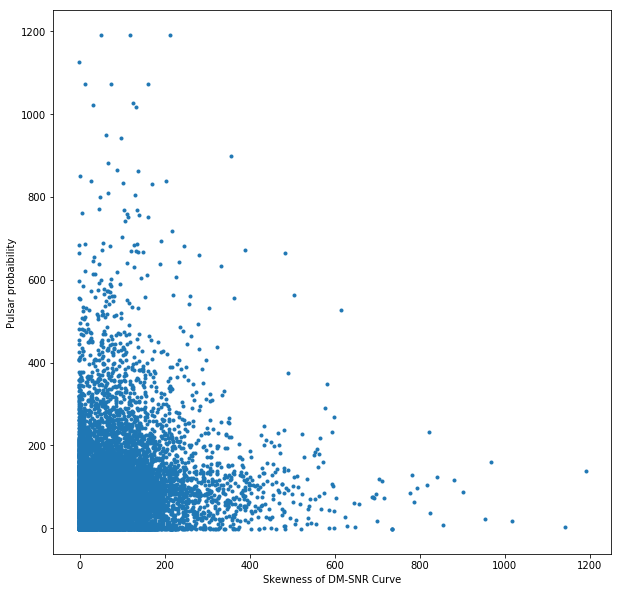

In [16]:

plt.figure(figsize=(10,10))
plt.plot(ds_train[:,7],ds_test[:,7],'.')
plt.xlabel("Skewness of DM-SNR Curve")
plt.ylabel("Pulsar probaibility")
plt.show()

Let us now create training and testing sets of date from the actual dataset for the algorithm

In [24]:
x_train = ds_train[:,0:8]
y_train = ds_train[:,8]
x_test = ds_test[:,0:8]
y_test = ds_test[:,8]
ts_test_y = ts_test[:,8]
ts_test_x = ts_test[:,0:8]
print("X and Y data is split")

X and Y data is split


In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8949, 8)
(8949, 8)
(8949,)
(8949,)


**Normalizing the data**

In [0]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

mean = ts_test_x.mean(axis=0)
ts_test_x -= mean
std = ts_test_x.std(axis=0)
ts_test_x /= std

Let us  create a Sequential model and add Dense layers to perfrm the training

In [27]:
model = Sequential()
model.add(Dense(12,input_dim = 8, activation = "linear"))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model.compile(loss='mse', optimizer='sgd', metrics=['mae'])

In [29]:
history = model.fit(x_train,y_train,epochs = 256, verbose=1,batch_size =32,validation_data=(x_test,y_test))
score = model.evaluate(ts_test_x, ts_test_y, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Instructions for updating:
Use tf.cast instead.
Train on 8949 samples, validate on 8949 samples
Epoch 1/256
8949/8949 [==============================] - 1s 99us/step - loss: 0.0828 - mean_absolute_error: 0.1703 - val_loss: 0.0288 - val_mean_absolute_error: 0.1019
Epoch 2/256
8949/8949 [==============================] - 0s 44us/step - loss: 0.0419 - mean_absolute_error: 0.1181 - val_loss: 0.0255 - val_mean_absolute_error: 0.0918
Epoch 3/256
8949/8949 [==============================] - 0s 43us/step - loss: 0.0348 - mean_absolute_error: 0.1038 - val_loss: 0.0215 - val_mean_absolute_error: 0.0814
Epoch 4/256
8949/8949 [==============================] - 0s 40us/step - loss: 0.0319 - mean_absolute_error: 0.0964 - val_loss: 0.0207 - val_mean_absolute_error: 0.0791
Epoch 5/256
8949/8949 [==============================] - 0s 41us/step - loss: 0.0302 - mean_absolute_error: 0.0926 - val_loss: 0.0201 - val_mean_absolute_error: 0.0766
Epoch 6/256
8949/8949 [==============================] - 0s 38us

In [32]:
prediction = model.predict(ts_test_x)
print(prediction[:])

[[ 0.26122648]
 [ 0.72131693]
 [-0.34919304]
 [ 0.71935374]
 [ 0.79158545]
 [-0.03211677]
 [ 0.12970275]
 [ 0.7326057 ]
 [ 0.8969813 ]
 [-0.12120026]
 [ 0.02910328]
 [-0.25135267]
 [ 0.8929392 ]
 [-0.07309926]
 [-0.19415337]
 [-0.11276549]
 [ 0.4805823 ]
 [-0.31934077]
 [ 1.1499326 ]
 [ 0.9957532 ]
 [-0.01221257]
 [ 0.12474069]
 [-0.19591975]
 [ 0.2822755 ]
 [ 0.31086704]
 [ 0.03767794]
 [-0.21858025]
 [-0.02912149]
 [ 0.12107143]
 [ 0.14966476]]


In [33]:
print(ts_test_y[:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [0]:
print(np.max(prediction[:]))

0.9999987
